# lib and import data

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define root directory
dir_root = '/content/drive/MyDrive/nandur'

# Split Data function

In [ ]:
def split_data(root_dir, train_size=0.8, val_size=0.15, test_size=0.05, random_seed=42):
    train_dir = os.path.join(root_dir, 'train')
    val_dir = os.path.join(root_dir, 'val')
    test_dir = os.path.join(root_dir, 'test')
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)
    for plant_type in os.listdir(root_dir):
        if os.path.isdir(os.path.join(root_dir, plant_type)):
            train_plant_dir = os.path.join(train_dir, plant_type)
            val_plant_dir = os.path.join(val_dir, plant_type)
            test_plant_dir = os.path.join(test_dir, plant_type)

            if not os.path.exists(train_plant_dir):
                os.makedirs(train_plant_dir)

            if not os.path.exists(val_plant_dir):
                os.makedirs(val_plant_dir)

            if not os.path.exists(test_plant_dir):
                os.makedirs(test_plant_dir)

            plant_images = [img for img in os.listdir(os.path.join(root_dir, plant_type)) if os.path.isfile(os.path.join(root_dir, plant_type, img))]

            train_images, test_images = train_test_split(plant_images, test_size=val_size + test_size, random_state=random_seed)
            val_images, test_images = train_test_split(test_images, test_size=test_size/(val_size + test_size), random_state=random_seed)

            for image in train_images:
                src_path = os.path.join(root_dir, plant_type, image)
                dest_path = os.path.join(train_plant_dir, image)
                shutil.copy(src_path, dest_path)

            for image in val_images:
                src_path = os.path.join(root_dir, plant_type, image)
                dest_path = os.path.join(val_plant_dir, image)
                shutil.copy(src_path, dest_path)

            for image in test_images:
                src_path = os.path.join(root_dir, plant_type, image)
                dest_path = os.path.join(test_plant_dir, image)
                shutil.copy(src_path, dest_path)

# Split here

In [ ]:
try:
    split_sehat = split_data(dir_root)
    if len(split_sehat) == 0:
        raise ValueError("No data found in the directory.")
except FileExistsError:
    print("None")
except ValueError as ve:
    print(ve)

With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


# Direktori cek and clear

In [ ]:
def cek_dir(root_dir):
  ada_sub_direktori_kosong = False
  for rootdir, dirs, files in os.walk(root_dir):
      for subdir in reversed(dirs):
          subdir_path = os.path.join(rootdir, subdir)
          if len(os.listdir(subdir_path)) == 0:
              print(f"Sub-direktori kosong: {subdir_path}")
              dirs.remove(subdir)
              os.rmdir(subdir_path)
          else:
                print(f"Sub-direktori berisi file: {subdir_path}")
  if not ada_sub_direktori_kosong:
    print("Tidak ada sub-direktori kosong.")

In [ ]:
cek_dir(dir_root)

Sub-direktori berisi file: /content/drive/MyDrive/nandur/test
Sub-direktori berisi file: /content/drive/MyDrive/nandur/val
Sub-direktori berisi file: /content/drive/MyDrive/nandur/train
Sub-direktori berisi file: /content/drive/MyDrive/nandur/Pokchoy_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/selada_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/selada_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/tomat_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/daun_tomat_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/daun_tomat_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/timun_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/sawi_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/timun_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/pokchoy_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/tomat_sehat
Sub-direktori berisi file: /content/driv

In [ ]:
def cek_indir(directory):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if folder in ["train", "val", "test"]:
            for plant_folder in os.listdir(folder_path):
                plant_path = os.path.join(folder_path, plant_folder)
                if os.path.isdir(plant_path):
                    num_train_data = len(os.listdir(plant_path))
                    print(f"{folder} of images in {plant_folder}, {directory}: {num_train_data}")
            print("\n")

In [ ]:
cek_indir(dir_root)

train of images in daun_timun_sehat, /content/drive/MyDrive/nandur: 80
train of images in daun_timun_sakit, /content/drive/MyDrive/nandur: 80
train of images in sawi_sehat, /content/drive/MyDrive/nandur: 80
train of images in tomat_sehat, /content/drive/MyDrive/nandur: 82
train of images in pokchoy_sehat, /content/drive/MyDrive/nandur: 80
train of images in timun_sehat, /content/drive/MyDrive/nandur: 108
train of images in sawi_sakit, /content/drive/MyDrive/nandur: 100
train of images in timun_sakit, /content/drive/MyDrive/nandur: 98
train of images in daun_tomat_sehat, /content/drive/MyDrive/nandur: 82
train of images in daun_tomat_sakit, /content/drive/MyDrive/nandur: 80
train of images in tomat_sakit, /content/drive/MyDrive/nandur: 84
train of images in selada_sakit, /content/drive/MyDrive/nandur: 80
train of images in selada_sehat, /content/drive/MyDrive/nandur: 80
train of images in Pokchoy_sakit, /content/drive/MyDrive/nandur: 88


val of images in daun_timun_sehat, /content/driv

# image generator

In [ ]:
train_root = '/content/drive/MyDrive/nandur/train'
val_root = '/content/drive/MyDrive/nandur/val'
test_root = '/content/drive/MyDrive/nandur/test'


**ImageDataGenerator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training dataset
training_datagen = ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for validation dataset
validation_datagen = ImageDataGenerator(rescale=1./255.0)

# Rescaling for test dataset
test_datagen = ImageDataGenerator(rescale=1./255.0)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    directory=train_root,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
    directory=val_root,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    directory=test_root,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 1202 images belonging to 14 classes.
Found 224 images belonging to 14 classes.
Found 154 images belonging to 14 classes.


# Def Model

**Model klasifikasi**

In [ ]:
def klas_base_model(input_shape, num_class):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_shape)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
  ])
  model.compile(loss = 'categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
  return model


# Callback

In [ ]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') > 0.95):
        print("\nLoss is lower than 0.3 and acc is above 0.9 so cancelling training!")
        self.model.stop_training = True
        print(f'Epoch {epoch} ended with logs: {logs}')
callbacks = Callback()

# Model Sumary





In [ ]:
# Print the model summary
model_klas = klas_base_model(input_shape=(150, 150,3), num_class=14)
model_klas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

# Training Base Model

In [ ]:
nandur = model_klas
nandur.fit(train_generator,
           epochs=10,
           steps_per_epoch=len(train_generator)/32,
           verbose=2,
           validation_data=validation_generator,
           callbacks=[callbacks])


Epoch 1/10
1/1 - 183s - loss: 2.6471 - accuracy: 0.0600 - val_loss: 2.6359 - val_accuracy: 0.0670 - 183s/epoch - 154s/step
Epoch 2/10
1/1 - 32s - loss: 2.6464 - accuracy: 0.0312 - val_loss: 2.6359 - val_accuracy: 0.0893 - 32s/epoch - 27s/step
Epoch 3/10
1/1 - 28s - loss: 2.6186 - accuracy: 0.0625 - val_loss: 2.6345 - val_accuracy: 0.0982 - 28s/epoch - 24s/step
Epoch 4/10
1/1 - 29s - loss: 2.6386 - accuracy: 0.0938 - val_loss: 2.6337 - val_accuracy: 0.0714 - 29s/epoch - 24s/step
Epoch 5/10
1/1 - 42s - loss: 2.6020 - accuracy: 0.1562 - val_loss: 2.6356 - val_accuracy: 0.0714 - 42s/epoch - 36s/step
Epoch 6/10
1/1 - 20s - loss: 2.6364 - accuracy: 0.0781 - val_loss: 2.6323 - val_accuracy: 0.0714 - 20s/epoch - 17s/step
Epoch 7/10
1/1 - 18s - loss: 2.6447 - accuracy: 0.0938 - val_loss: 2.6210 - val_accuracy: 0.0714 - 18s/epoch - 15s/step
Epoch 8/10
1/1 - 21s - loss: 2.6073 - accuracy: 0.0938 - val_loss: 2.6101 - val_accuracy: 0.0714 - 21s/epoch - 18s/step
Epoch 9/10
1/1 - 18s - loss: 2.5937 -

# Save Model

In [ ]:
nandur.save("/content/drive/MyDrive/model/nandur.h5")
model_json = nandur.to_json()
with open("/content/drive/MyDrive/model/nandur.json", "w") as json_file:
    json_file.write(model_json)

nandur.save_weights("/content/drive/MyDrive/model/nandur_weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Ploting


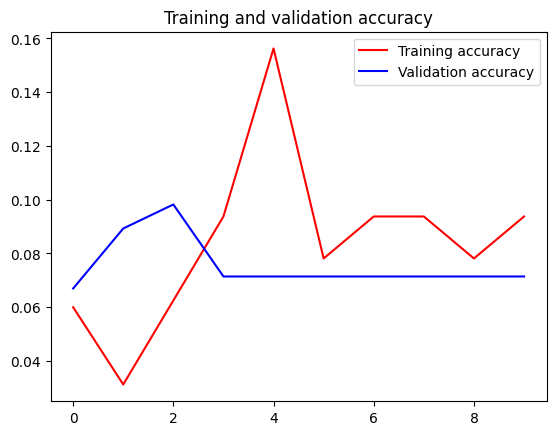

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

history = nandur.history

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Test model tanaman


In [ ]:
predictions = nandur.predict_generator(test_generator, steps=len(test_generator), verbose=1)

class_labels = ["bok choy sakit", "daun timun sakit", "daun timun sehat",
                "daun tomat sakit", "daun tomat sehat", "bok choy sehat",
                "sawi sakit", "sawi sehat","selada sakit", "selada sehat",
                "timun sakit","timun sehat", "tomat sakit", "tomat sehat"]
class_indices = []
decoded_labels = []
for prediction in predictions:
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]
    decoded_labels.append(predicted_class_label)
    class_indices.append(predicted_class_index)
file_names = test_generator.filenames

for file_name, predicted_label, predicted_probabilities in zip(file_names, decoded_labels, predictions):
    print(f"File: {file_name}")
    print(f"Predicted Label: {predicted_label}")
    print("Predicted Probabilities:")
    for class_label, probability in zip(class_labels, predicted_probabilities):
        print(f"{class_label}: {probability:.4f}")

    print("\n")


 13/154 [=>............................] - ETA: 1s

<ipython-input-55-bc3106e3c070>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = nandur.predict_generator(test_generator, steps=len(test_generator), verbose=1)


154/154 [==============================] - 2s 10ms/step
File: Pokchoy_sakit/30_jpg.rf.042da058c7df5b3bc30afa6551abde8c.jpg
Predicted Label: bok choy sakit
Predicted Probabilities:
bok choy sakit: 0.9164
daun timun sakit: 0.0000
daun timun sehat: 0.0000
daun tomat sakit: 0.0001
daun tomat sehat: 0.0000
bok choy sehat: 0.0000
sawi sakit: 0.0005
sawi sehat: 0.0000
selada sakit: 0.0829
selada sehat: 0.0001
timun sakit: 0.0000
timun sehat: 0.0000
tomat sakit: 0.0000
tomat sehat: 0.0000


File: Pokchoy_sakit/30_jpg.rf.b170f778046e1cb2c71a1363bfbd786f.jpg
Predicted Label: timun sakit
Predicted Probabilities:
bok choy sakit: 0.0245
daun timun sakit: 0.0000
daun timun sehat: 0.0000
daun tomat sakit: 0.0002
daun tomat sehat: 0.0000
bok choy sehat: 0.0009
sawi sakit: 0.0280
sawi sehat: 0.0021
selada sakit: 0.0015
selada sehat: 0.0172
timun sakit: 0.9176
timun sehat: 0.0067
tomat sakit: 0.0000
tomat sehat: 0.0013


File: Pokchoy_sakit/60-Copy_jpg.rf.4258d6abb898d615f0276518e4e5f928.jpg
Predicted L

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_indices)), np.max(predictions, axis=1), tick_label=file_names, color='blue')
plt.xlabel('File Names')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability for Each Class')
plt.show()

# Upload predict

In [ ]:
for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = jenis_tanaman.predict(images, batch_size=10)
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]
    decoded_labels.append(predicted_class_label)

decoded_predictions = decoded_labels

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

class_labels = ["bok choy", "daun timun", "daun tomat", "kubis", "sawi", "selada", "timun", "tomat"]

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0
    predictions_jenis = jenis_tanaman2.predict(x, batch_size=10)
    predicted_class_index_jenis = np.argmax(predictions_jenis)
    predicted_class_label_jenis = class_labels[predicted_class_index_jenis]

    print(f"{fn} - Jenis Tanaman: {predicted_class_label_jenis}")

    predictions_keadaan = keadaan_tanaman.predict(x, batch_size=10)

    print(f"Keadaan Tanaman Probability: {predictions_keadaan[0]}")

    if predictions_keadaan[0] >= 0.3:
        print(f"{fn} - Sakit")
    else:
        print(f"{fn} - Sehat")

Saving Cucumber192.jpg to Cucumber192.jpg
1/1 [==============================] - 0s 28ms/step
Cucumber192.jpg - Jenis Tanaman: bok choy
1/1 [==============================] - 0s 28ms/step
Keadaan Tanaman Probability: [0.44826052]
Cucumber192.jpg - Sakit


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

class_labels = ["bok choy", "daun timun", "daun tomat", "kubis", "sawi", "selada", "timun", "tomat"]

decoded_labels = []

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = jenis_tanaman.predict(images, batch_size=10)
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]
    decoded_labels.append(predicted_class_label)

decoded_predictions = decoded_labels

file_names = test_generator_sehat.filenames

for file_name, prediction in zip(file_names, decoded_predictions):
    print(f"File: {file_name}, Prediction: {prediction}")

    classes = keadaan_tanaman.predict(images, batch_size=10)

    print(classes[0])

    if classes[0] > 0.5:
        print(file_name + " is a dog")
    else:
        print(file_name + " is a cat")


KeyboardInterrupt: ignored